**Importing Libraries**  
We start by importing necessary libraries and setting up the environment.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pickle


# Dataset Description

Loading the dataset from a CSV file named 'prep_smartphones.csv' and displaying the first few rows to get a glimpse of the data.

In [2]:
df = pd.read_csv('prep_smartphones.csv')
df.head()


,Brand,Price,Color,SIM Type,Hybrid Sim Slot,Display Size (cm),Resolution Type,Display Type,Processor Type,Internal Storage,...,Depth,Weight,Quick Charging,Processor Core,Primary Clock Speed,Audio Jack,RAM,Expandable Storage,Pixel Width,Pixel Height
0,0,48900,0,0,0,15.49,2,6,0,128,...,8.30,194.0,0,2,2334.607426,0,6,1024,1792,828
1,0,43900,0,0,0,15.49,2,2,0,64,...,8.30,194.0,0,2,2334.607426,0,6,512,1792,828
2,0,48900,10,0,0,15.49,2,6,0,128,...,8.30,194.0,0,2,2334.607426,0,6,1024,1792,828
3,0,69900,1,0,0,15.49,2,6,0,128,...,7.65,173.0,1,2,2334.607426,0,6,1024,2532,1170
4,0,69900,4,0,0,15.49,2,6,0,128,...,7.65,173.0,1,2,2334.607426,0,6,1024,2532,1170


Displaying the shape of the dataset (number of rows and columns).

In [3]:
df.shape


(3296, 27)

Displaying basic statistics of the dataset, such as mean, standard deviation, minimum, and maximum values for numeric columns.

In [4]:
df.describe()


,Brand,Price,Color,SIM Type,Hybrid Sim Slot,Display Size (cm),Resolution Type,Display Type,Processor Type,Internal Storage,...,Depth,Weight,Quick Charging,Processor Core,Primary Clock Speed,Audio Jack,RAM,Expandable Storage,Pixel Width,Pixel Height
count,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000,...,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000
mean,7.587379,36866.834951,3.500607,0.158981,0.290352,16.182488,1.082828,2.001517,5.132585,142.984830,...,8.627209,186.611968,0.317961,2.752427,2334.607426,0.505765,6.648968,799.585862,2064.450546,1163.305825
std,4.427834,33262.345798,3.512821,0.625870,0.453994,1.374624,0.525059,1.731524,2.867169,119.573312,...,5.497435,21.883689,0.465755,0.600955,2212.645644,0.500043,6.113962,381.511924,569.821948,424.816511
min,0.000000,799.000000,0.000000,0.000000,0.000000,10.160000,0.000000,0.000000,0.000000,4.000000,...,0.800000,112.000000,0.000000,0.000000,0.100000,0.000000,1.000000,7.000000,480.000000,480.000000
25%,4.000000,16999.000000,1.000000,0.000000,0.000000,16.210000,1.000000,1.000000,3.000000,64.000000,...,7.900000,180.000000,0.000000,3.000000,2000.000000,0.000000,4.000000,512.000000,1600.000000,1080.000000
50%,9.000000,23990.000000,2.000000,0.000000,0.000000,16.510000,1.000000,2.000000,5.000000,128.000000,...,8.425000,186.433471,0.000000,3.000000,2300.000000,1.000000,6.000000,1024.000000,2400.000000,1080.000000
75%,12.000000,41574.000000,6.000000,0.000000,1.000000,16.810000,1.000000,3.000000,8.000000,128.000000,...,8.621132,194.000000,1.000000,3.000000,2400.000000,1.000000,8.000000,1024.000000,2400.000000,1080.000000
max,13.000000,189999.000000,11.000000,3.000000,1.000000,41.940000,7.000000,7.000000,10.000000,1024.000000,...,152.500000,454.000000,1.000000,5.000000,90000.000000,1.000000,128.000000,2048.000000,3216.000000,3200.000000


Getting information about the dataset, including data types and non-null counts for each column.

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3296 entries, 0 to 3295
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                3296 non-null   int64  
 1   Price                3296 non-null   int64  
 2   Color                3296 non-null   int64  
 3   SIM Type             3296 non-null   int64  
 4   Hybrid Sim Slot      3296 non-null   int64  
 5   Display Size (cm)    3296 non-null   float64
 6   Resolution Type      3296 non-null   int64  
 7   Display Type         3296 non-null   int64  
 8   Processor Type       3296 non-null   int64  
 9   Internal Storage     3296 non-null   int64  
 10  Primary Camera       3296 non-null   int64  
 11  Secondary Camera     3296 non-null   int64  
 12  Network Type         3296 non-null   int64  
 13  Bluetooth Version    3296 non-null   float64
 14  Battery Capacity     3296 non-null   int64  
 15  Width                3296 non-null   f

Checking for missing values in the dataset. The result is a count of missing values for entire dataframe.

In [6]:
df.isna().sum().sum()


0

Checking for missing values again but displaying the count of missing values for each column.

In [7]:
df.isna().sum()


Brand                  0
Price                  0
Color                  0
SIM Type               0
Hybrid Sim Slot        0
Display Size (cm)      0
Resolution Type        0
Display Type           0
Processor Type         0
Internal Storage       0
Primary Camera         0
Secondary Camera       0
Network Type           0
Bluetooth Version      0
Battery Capacity       0
Width                  0
Height                 0
Depth                  0
Weight                 0
Quick Charging         0
Processor Core         0
Primary Clock Speed    0
Audio Jack             0
RAM                    0
Expandable Storage     0
Pixel Width            0
Pixel Height           0
dtype: int64

# EDA

Categorizing certain columns as category types for better analysis.

In [8]:
category_cols = ['Brand', 'Color', 'SIM Type', 'Hybrid Sim Slot', 'Resolution Type', 'Display Type', 'Processor Type', 'Quick Charging', 'Processor Core', 'Audio Jack', 'Network Type']
df[category_cols] = df[category_cols].astype('category')
categoric = df.select_dtypes(include='category')
numeric = df.select_dtypes(include='number')


Creating a correlation matrix to visualize the correlation between numeric variables in the dataset.

In [9]:
corr_matrix = numeric.corr()
corr_matrix['Price'].sort_values()


Battery Capacity      -0.141399
Depth                 -0.079805
Height                -0.075750
Display Size (cm)     -0.051669
Primary Camera        -0.015687
Secondary Camera       0.044781
Primary Clock Speed    0.061905
Width                  0.089776
RAM                    0.124198
Pixel Height           0.128298
Expandable Storage     0.142204
Bluetooth Version      0.167440
Weight                 0.245258
Pixel Width            0.347403
Internal Storage       0.701938
Price                  1.000000
Name: Price, dtype: float64

Displaying the correlation heatmap using Seaborn.

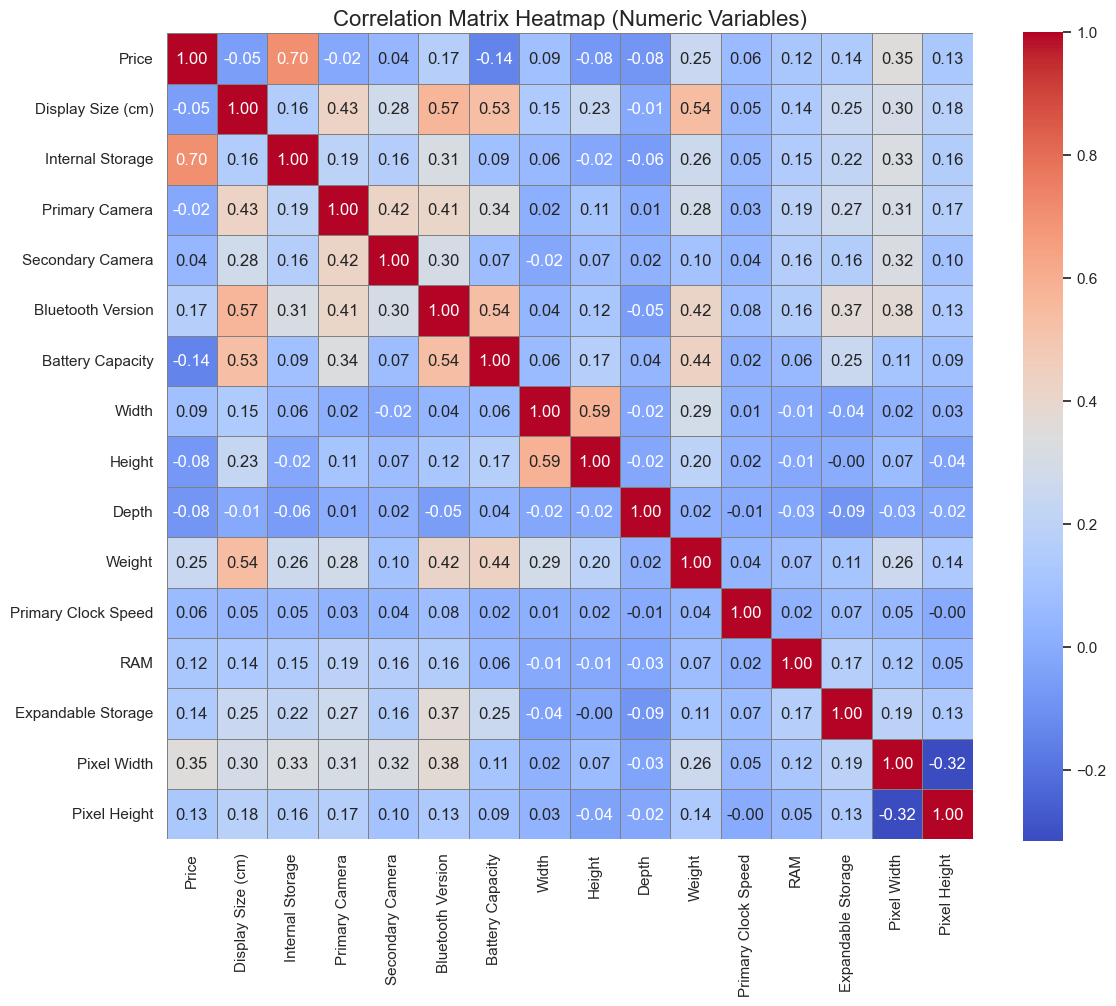

In [10]:
plt.figure(figsize=(12, 10))
sns.set(font_scale=1)
sns.set_style('whitegrid')
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, fmt='.2f', linewidths=0.5, linecolor='gray')

plt.title('Correlation Matrix Heatmap (Numeric Variables)', fontsize=16)
plt.tight_layout()
plt.show()


**Inference:** The heatmap visually represents the correlation between numeric variables. Higher values on the heatmap indicate stronger positive or negative correlations. For example, the 'Internal Storage' feature is highly positively correlated with 'Price.'

Performing point-biserial correlation analysis between categorical variables and the 'Price' column.

This analysis quantifies the correlation between categorical variables and the 'Price.' It provides the 'H-statistic' and 'p-value' for each categorical variable.

In [11]:
from scipy.stats import pointbiserialr

corrs = []
for col in categoric:
    h_statistic, p_value = pointbiserialr(df[col], df['Price'].to_numpy())
    corr = {
        'Categorical Variable': col,
        'H-statistic': h_statistic,
        'p-value': p_value
    }
    corrs.append(corr)

corr_df = pd.DataFrame(corrs, columns=['Categorical Variable', 'H-statistic', 'p-value'])
corr_df_sorted = corr_df.sort_values(by='p-value')
corr_df_sorted


,Categorical Variable,H-statistic,p-value
0,Brand,-0.367033,1.202473e-105
4,Resolution Type,0.365707,7.660502e-105
7,Network Type,0.354867,2.079389e-98
6,Processor Type,-0.348224,1.375377e-94
9,Processor Core,-0.347813,2.353500e-94
10,Audio Jack,-0.240866,1.019862e-44
5,Display Type,0.232211,1.338909e-41
2,SIM Type,0.218070,8.946888e-37
8,Quick Charging,0.130972,4.390726e-14
1,Color,0.097037,2.377163e-08


Creating a bar plot to visualize the p-values from the point-biserial correlation analysis.

C:\Users\Girish\AppData\Local\Temp\ipykernel_11448\1262265084.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='p-value', y='Categorical Variable', data=corr_df_sorted, palette='coolwarm')


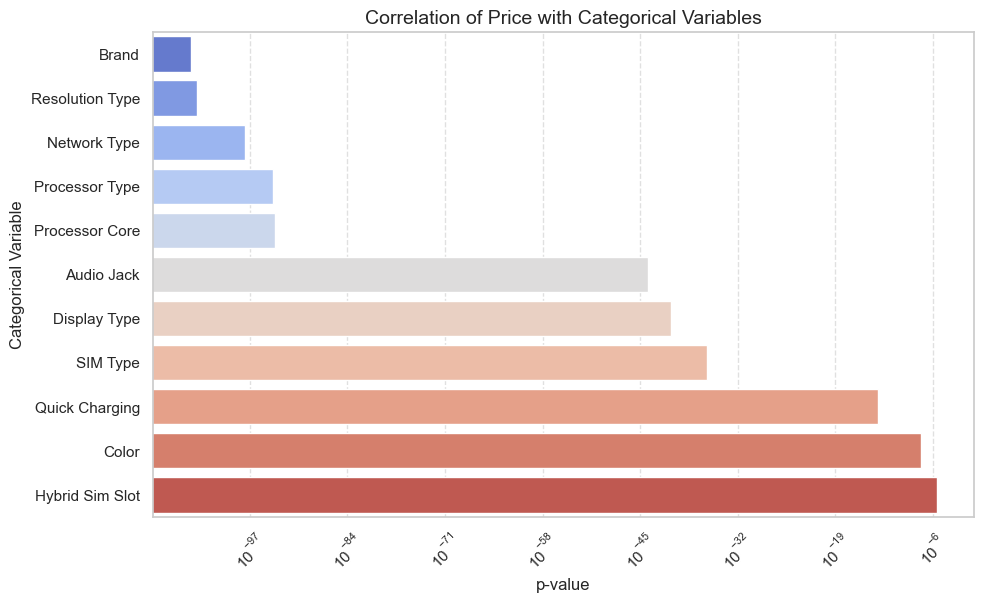

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='p-value', y='Categorical Variable', data=corr_df_sorted, palette='coolwarm')
plt.xscale('log')
plt.xlabel('p-value', fontsize=12)
plt.ylabel('Categorical Variable', fontsize=12)
plt.title('Correlation of Price with Categorical Variables', fontsize=14)
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.show()


**Inference:** The bar plot helps identify which categorical variables have a significant influence on the 'Price.' Lower p-values indicate stronger correlations.

Generating histograms for numeric variables in the dataset.

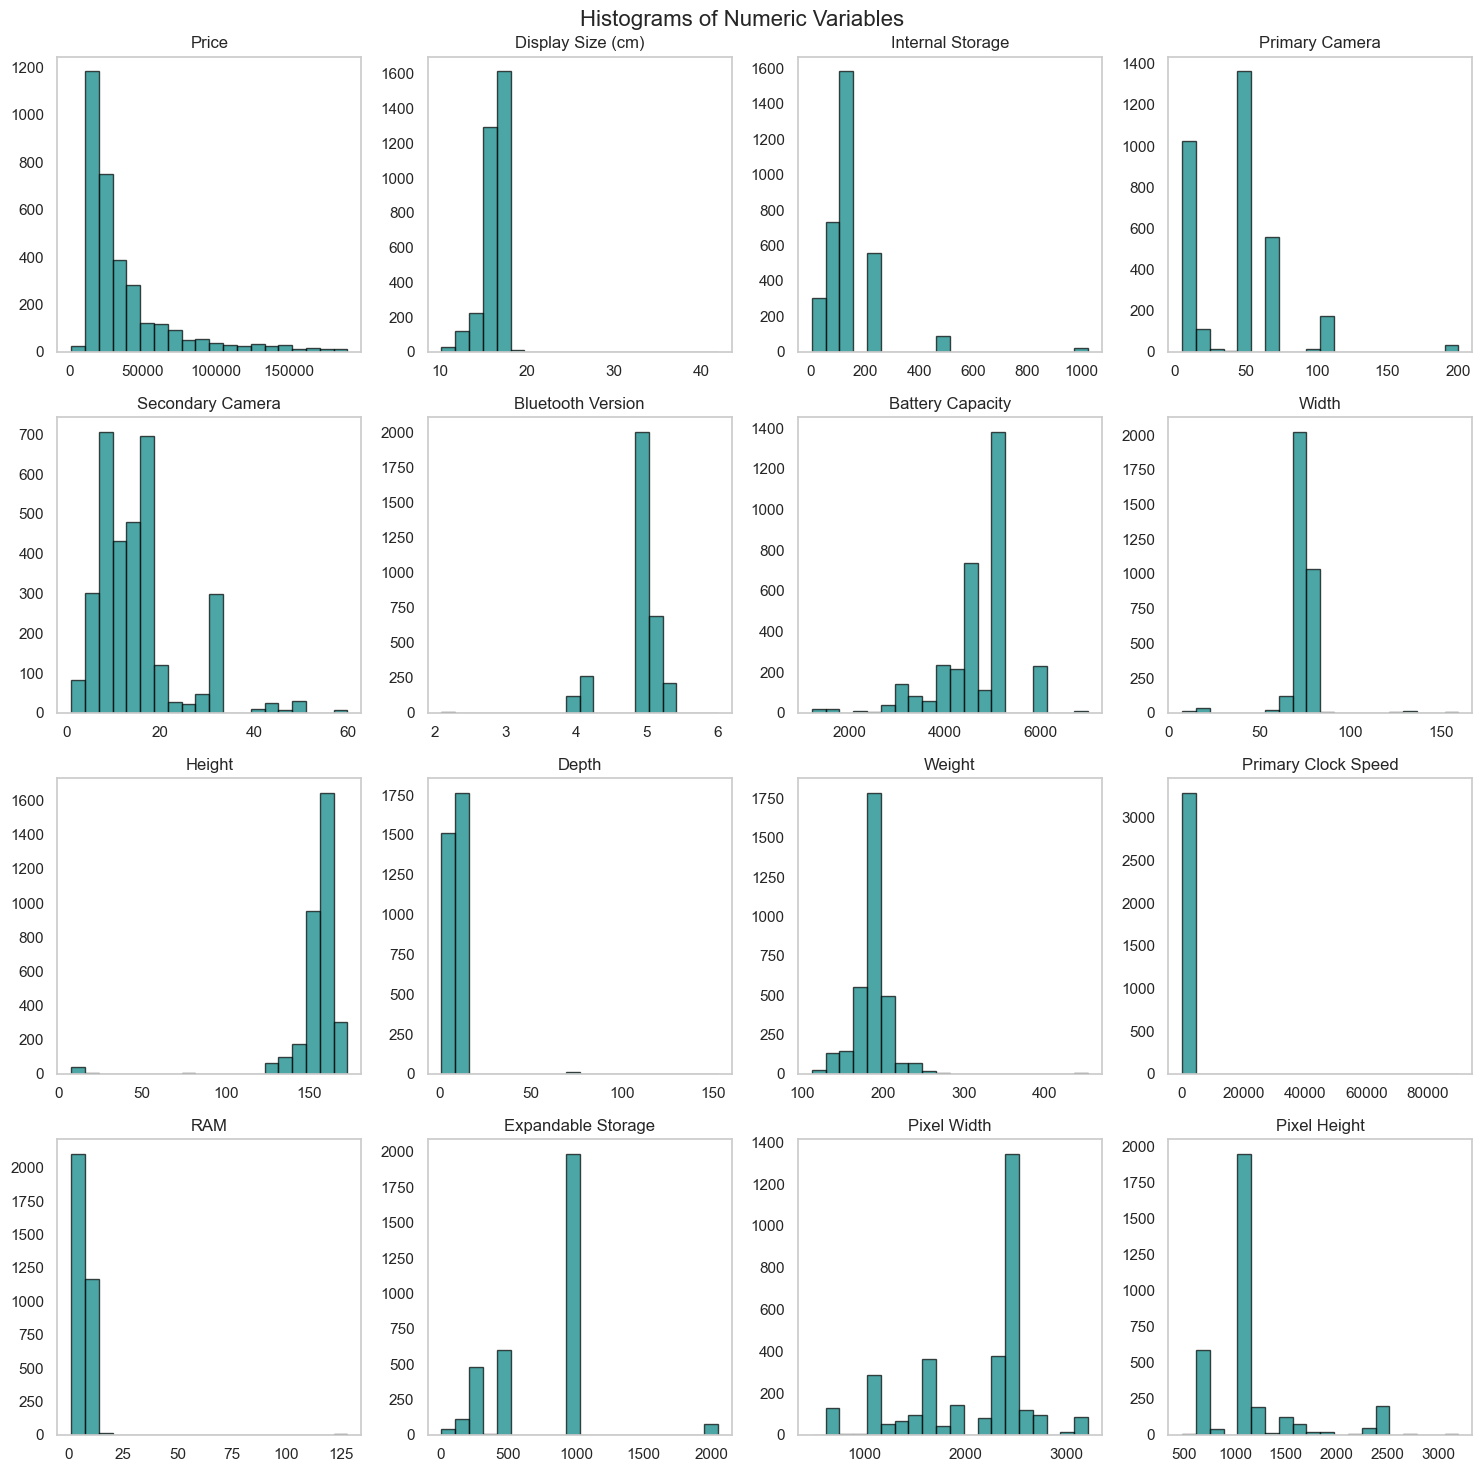

In [13]:
df.hist(bins=20, color='teal', alpha=0.7, edgecolor='black', grid=False, layout=(4, 4), figsize=(15, 15))
plt.suptitle('Histograms of Numeric Variables', fontsize=16)
plt.tight_layout()
plt.show()


**Inference:** The histograms provide a visual representation of the distribution of numeric variables. It's evident that the data is not normally distributed and is skewed.

Creating scatter plots for numeric variables against the 'Price' column.

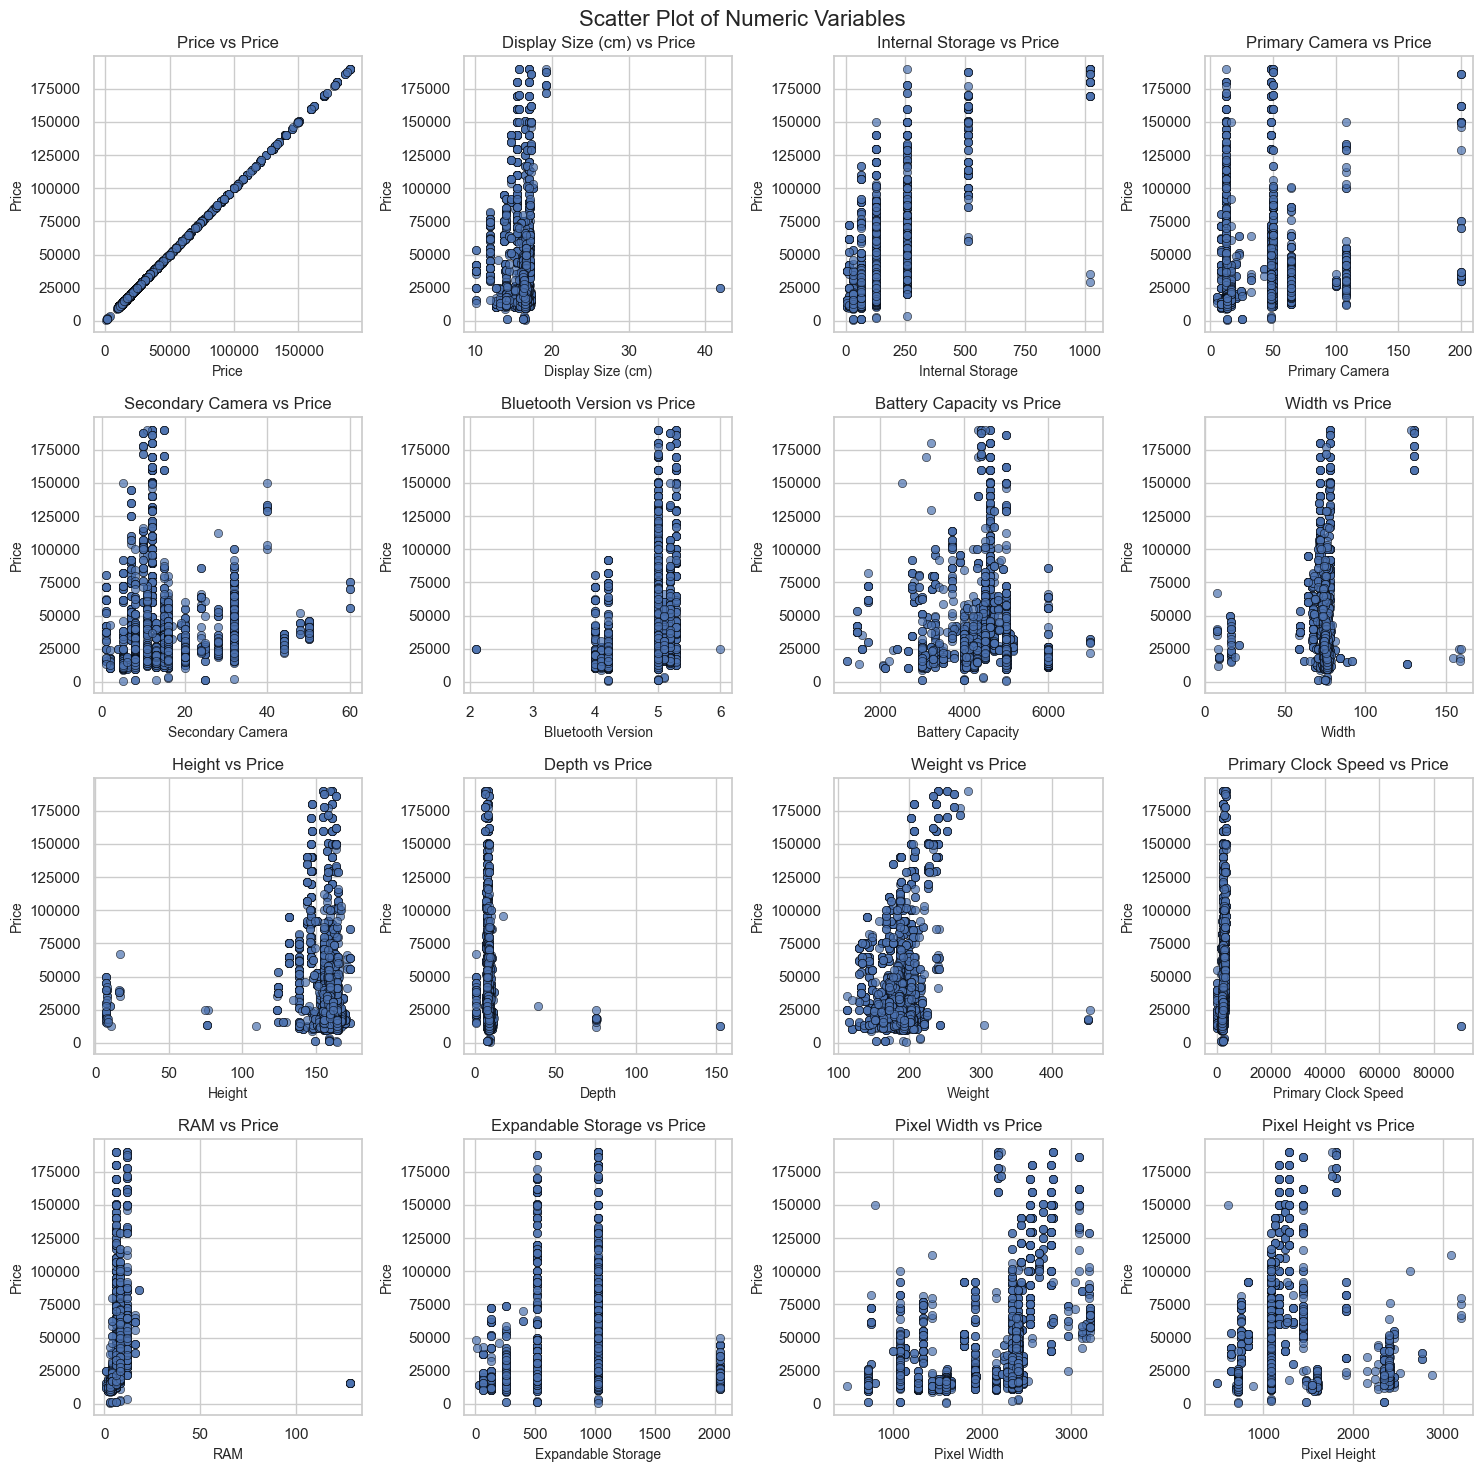

In [14]:
nrows, ncols = 4, 4
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))

for i in range(nrows):
    for j in range(ncols):
        ax = axes[i, j]
        col = numeric.columns[i * ncols + j]
        sns.scatterplot(x=col, y='Price', data=df, ax=ax, alpha=0.7, edgecolor='black')
        ax.set_xlabel(col, fontsize=10)
        ax.set_ylabel('Price', fontsize=10)
        ax.set_title(f'{col} vs Price', fontsize=12)

plt.suptitle('Scatter Plot of Numeric Variables', fontsize=16)
plt.tight_layout()
plt.show()


**Inference:** These scatter plots show the relationship between numeric variables and the 'Price.' They reveal that the data is dispersed and not homoscedastic.

Generating a box plot for the 'Internal Storage' variable against the 'Price.'

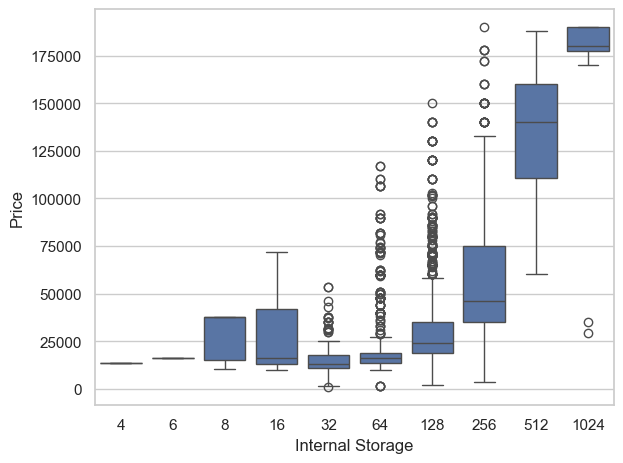

In [15]:
sns.boxplot(x='Internal Storage', y='Price', data=df)
plt.tight_layout()
plt.show()


**Inference:** The box plot shows the distribution of 'Price' concerning 'Internal Storage.' It indicates that the data has many outliers.

Generating a violin plot for the 'Internal Storage' variable against the 'Price.'

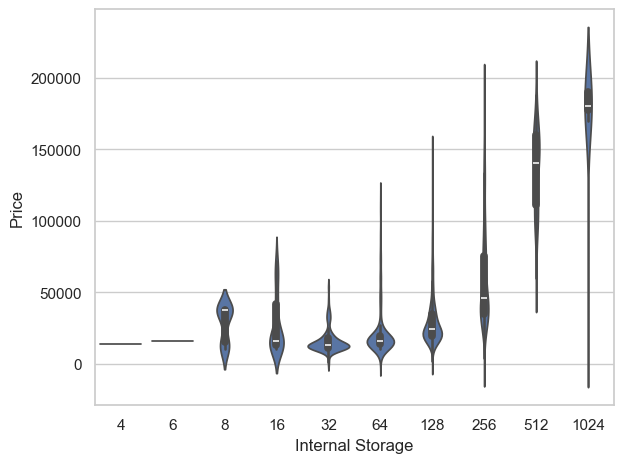

In [16]:
sns.violinplot(x='Internal Storage', y='Price', data=df)
plt.tight_layout()
plt.show()


**Inference:** The violin plot for 'Internal Storage' vs. 'Price' provides information about the data's spread and density.

Creating a joint plot (scatter plot with regression line) for 'Internal Storage' vs. 'Price.'

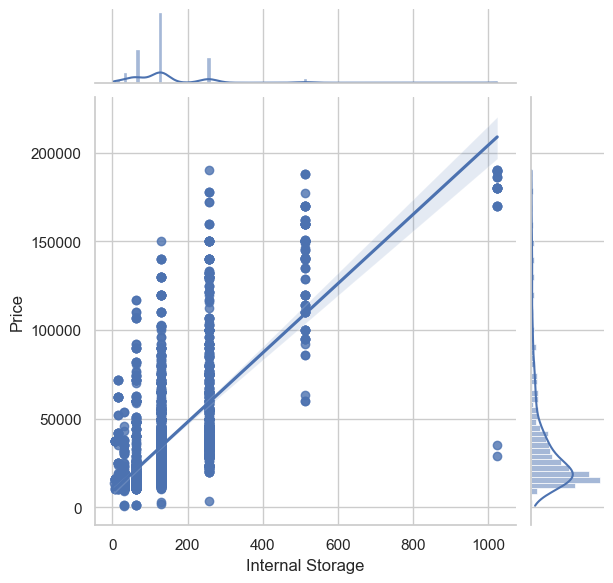

In [17]:
sns.jointplot(x='Internal Storage', y='Price', data=df, kind='reg')
plt.show()


**Inference:** The joint plot shows the relationship between 'Internal Storage' and 'Price' with a regression line.

# Model Building

Preparing the data for model building by selecting specific numeric and categorical features.

In [18]:
numeric_features = ['Price', 'RAM', 'Internal Storage', 'Battery Capacity']
categoric_features = ['Resolution Type', 'Processor Type', 'Processor Core']
features = numeric_features + categoric_features
df = df[features]
numeric = df.select_dtypes(include='number')
categoric = df.select_dtypes(include='category')


Applying a log transformation to the selected numeric features and saving the transformer to a file.

The log transformation is used to make the data more suitable for modeling, particularly when the data is skewed.

In [19]:
from sklearn.preprocessing import FunctionTransformer

transform = FunctionTransformer(func=np.log1p)
transformed_df = transform.fit_transform(numeric)
for col in categoric.columns:
    transformed_df[col] = df[col]

transformed_df.head()


,Price,RAM,Internal Storage,Battery Capacity,Resolution Type,Processor Type,Processor Core
0,10.797553,1.94591,4.859812,8.042699,2,0,2
1,10.689692,1.94591,4.174387,8.042699,2,0,2
2,10.797553,1.94591,4.859812,8.042699,2,0,2
3,11.154835,1.94591,4.859812,8.083637,2,0,2
4,11.154835,1.94591,4.859812,8.083637,2,0,2


In [20]:
with open('log_transform.pkl', 'wb') as f:
    pickle.dump(transform, f)


Generating histograms of log-transformed numeric variables.

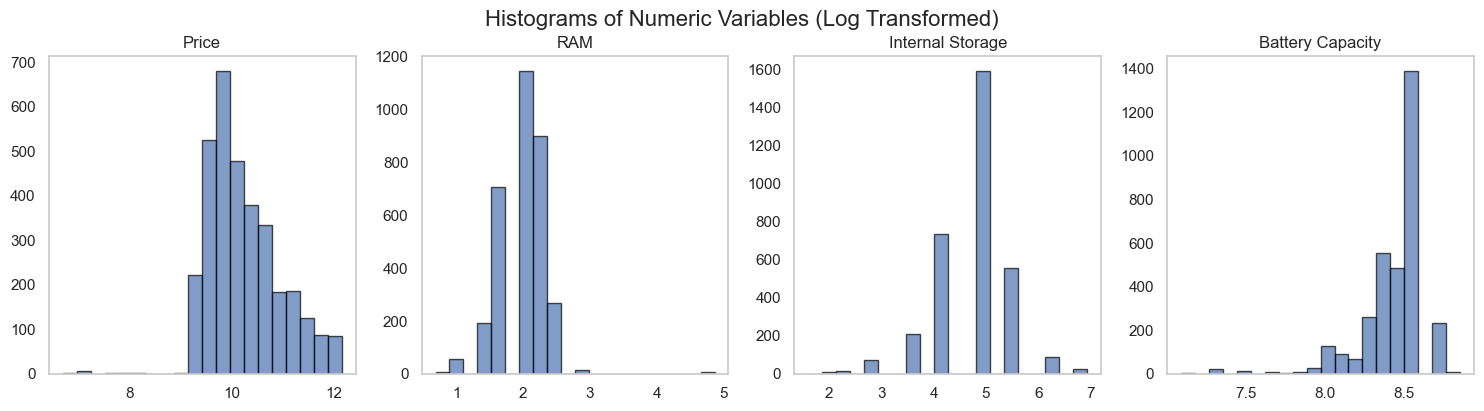

In [21]:
transformed_df.hist(bins=20, alpha=0.7, edgecolor='black', grid=False, layout=(4, 4), figsize=(15, 15))
plt.suptitle('Histograms of Numeric Variables (Log Transformed)', fontsize=16)
plt.tight_layout()
plt.show()


**Inference:** The histograms now display log-transformed data, which are more normally distributed compared to before.

Scaling the data using Min-Max scaling to bring features within a consistent range.

Scaling the data helps ensure that features are on the same scale, which is important for machine learning models.

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(transformed_df)
scaled_df = pd.DataFrame(scaled, columns=transformed_df.columns)
scaled_df.head()


,Price,RAM,Internal Storage,Battery Capacity,Resolution Type,Processor Type,Processor Core
0,0.751886,0.300663,0.610627,0.539900,0.285714,0.0,0.4
1,0.732168,0.300663,0.481861,0.539900,0.285714,0.0,0.4
2,0.751886,0.300663,0.610627,0.539900,0.285714,0.0,0.4
3,0.817200,0.300663,0.610627,0.563122,0.285714,0.0,0.4
4,0.817200,0.300663,0.610627,0.563122,0.285714,0.0,0.4


Saving the scaler to a file.

In [23]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


Splitting the data into training and testing sets for model building.

Preparing a DataFrame with covariates (independent variables) for model evaluation.

In [24]:
from sklearn.model_selection import train_test_split

X = scaled_df.drop('Price', axis=1)
y = scaled_df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cols = features.copy()
cols.remove('Price')
covariates = pd.DataFrame(X_test, columns=cols)


Fitting a Linear Regression model to the training data and making predictions on the test data.

In [25]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)


Fitting a Gaussian Process model to the training data and making predictions on the test data.

In [26]:
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel
from sklearn.gaussian_process import GaussianProcessRegressor

kernel = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2)) + WhiteKernel(1e-1)
gpr_model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gpr_model.fit(X_train, y_train)
gpr_pred = gpr_model.predict(X_test)


Defining a function to calculate Theil's U statistics for model evaluation.

In [27]:
def theils_u(y_true, y_pred):
    n = len(y_true)
    U1 = np.sqrt(np.sum((y_true - y_pred) ** 2)) / np.sqrt(np.sum(y_true ** 2))
    U2 = np.sqrt(np.sum((y_true - y_pred) ** 2)) / np.sqrt(np.sum(y_pred ** 2))
    return U1, U2


Defining a function to calculate the Index of Agreement for model evaluation.

In [28]:
def index_of_agreement(y_true, y_pred):
    numerator = np.sum((y_true - y_pred) ** 2)
    denominator = np.sum((np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))) ** 2)
    return 1 - (numerator / denominator)


Defining a function to perform the Breusch-Pagan test for heteroscedasticity on model residuals.

In [30]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

def breusch_pagan_test(residuals, covariates):
    covariates = sm.add_constant(covariates)
    min_rows = min(len(residuals), len(covariates))
    residuals = residuals[:min_rows]
    covariates = covariates[:min_rows]
    lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(residuals, covariates)
    return lm, lm_p_value, fvalue, f_p_value


Defining a function to perform the Durbin-Watson test for autocorrelation on model residuals.

In [31]:
from statsmodels.stats.stattools import durbin_watson

def durbin_watson_test(residuals):
    dw_statistic = durbin_watson(residuals)
    return dw_statistic


Defining a function to plot the histogram of model residuals.

In [32]:
def plot_residual_histogram(residuals, model_name):
    sns.set_style("white")
    plt.hist(residuals, bins=20, edgecolor='k')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Residuals - {model_name.title()}')
    plt.show()


Defining a function to create scatter plots of residuals against covariates.

In [33]:
def plot_residual_vs_covariates(residuals, covariates, model_name):
    num_covariates = len(covariates.columns)
    num_rows = int(num_covariates / 2) + (num_covariates % 2)
    num_cols = 2

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))
    fig.suptitle(f"{model_name.title()} - Residuals vs. Covariates", fontsize=16)
    sns.set_style("white")
    for i, cov_name in enumerate(covariates.columns):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col]
        covariate = covariates[cov_name]
        ax.scatter(covariate, residuals, alpha=0.5)
        ax.set_xlabel(cov_name)
        ax.set_ylabel("Residuals")

    for i in range(num_covariates, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()


Defining a function to create scatter plots of residuals against covariates.

These metrics include R-squared, MAE, MSE, MAPE, Theil's U statistics, and the Index of Agreement. They are used to evaluate model performance.


In [34]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def calculate_metrics(y_true, y_pred, covariates, model_name):
    # Calculate Residuals
    residuals = y_true - y_pred

    # Calculate R-squared
    r_squared = r2_score(y_true, y_pred)

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_true, y_pred)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_true, y_pred)

    # Calculate Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    # Calculate Normalized Root Mean Squared Error (nRMSE)
    nrmse = np.sqrt(mse) / (max(y_true) - min(y_true))

    # Calculate Theil's U1 and U2
    u1, u2 = theils_u(y_true, y_pred)

    # Calculate Index of Agreement
    ioa = index_of_agreement(y_true, y_pred)

    # Create a Pandas DataFrame to store the metrics
    metrics_df = pd.DataFrame({
        'Model': [model_name],
        'R-squared': [r_squared],
        'MAE': [mae],
        'MSE': [mse],
        'MAPE': [mape],
        "Theil's U1": [u1],
        "Theil's U2": [u2],
        'Index of Agreement': [ioa]
    })

    # Durbin-Watson test (Test for autocorrelation among residuals)
    dw_stat = durbin_watson_test(residuals)
    metrics_df['Durbin-Watson Statistic'] = [dw_stat]

    # Calculate Test for heteroscedasticity (Breusch-Pagan Test) - p-value
    lm, lm_p_value, fvalue, f_p_value = breusch_pagan_test(residuals, covariates)

    if lm_p_value < 0.05:
        metrics_df['Heteroscedasticity'] = ["Yes"]
    else:
        metrics_df['Heteroscedasticity'] = ["No"]

    metrics_df['Breusch-Pagan LM Statistic'] = [lm]
    metrics_df['Breusch-Pagan LM P-Value'] = [lm_p_value]
    metrics_df['Breusch-Pagan F-Stat'] = [fvalue]
    metrics_df['Breusch-Pagan F P-Value'] = [f_p_value]

    return metrics_df


Applying the Linear Regression model to the test data and calculating various metrics.

In [35]:
residuals = y_test - lr_pred
model_name = 'Linear Regression'
lr_metrics = calculate_metrics(y_test, lr_pred, covariates, model_name)
lr_metrics.T


,0
Model,Linear Regression
R-squared,0.632301
MAE,0.059899
MSE,0.006383
MAPE,10.685678
Theil's U1,0.119332
Theil's U2,0.119961
Index of Agreement,0.874461
Durbin-Watson Statistic,2.137027
Heteroscedasticity,Yes


Plotting the histogram of residuals for the Linear Regression model.

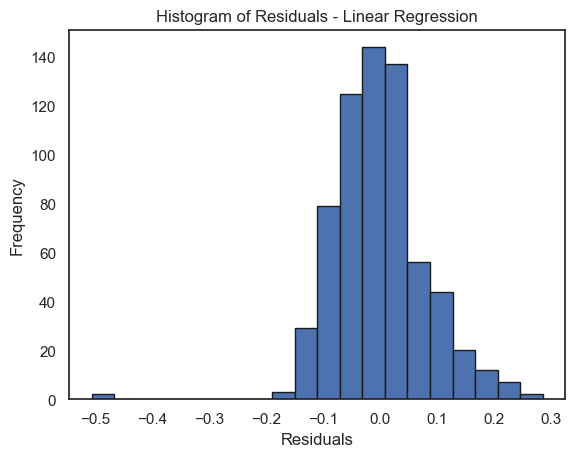

In [36]:
plot_residual_histogram(residuals, model_name)


Creating scatter plots of residuals against covariates for the Linear Regression model.

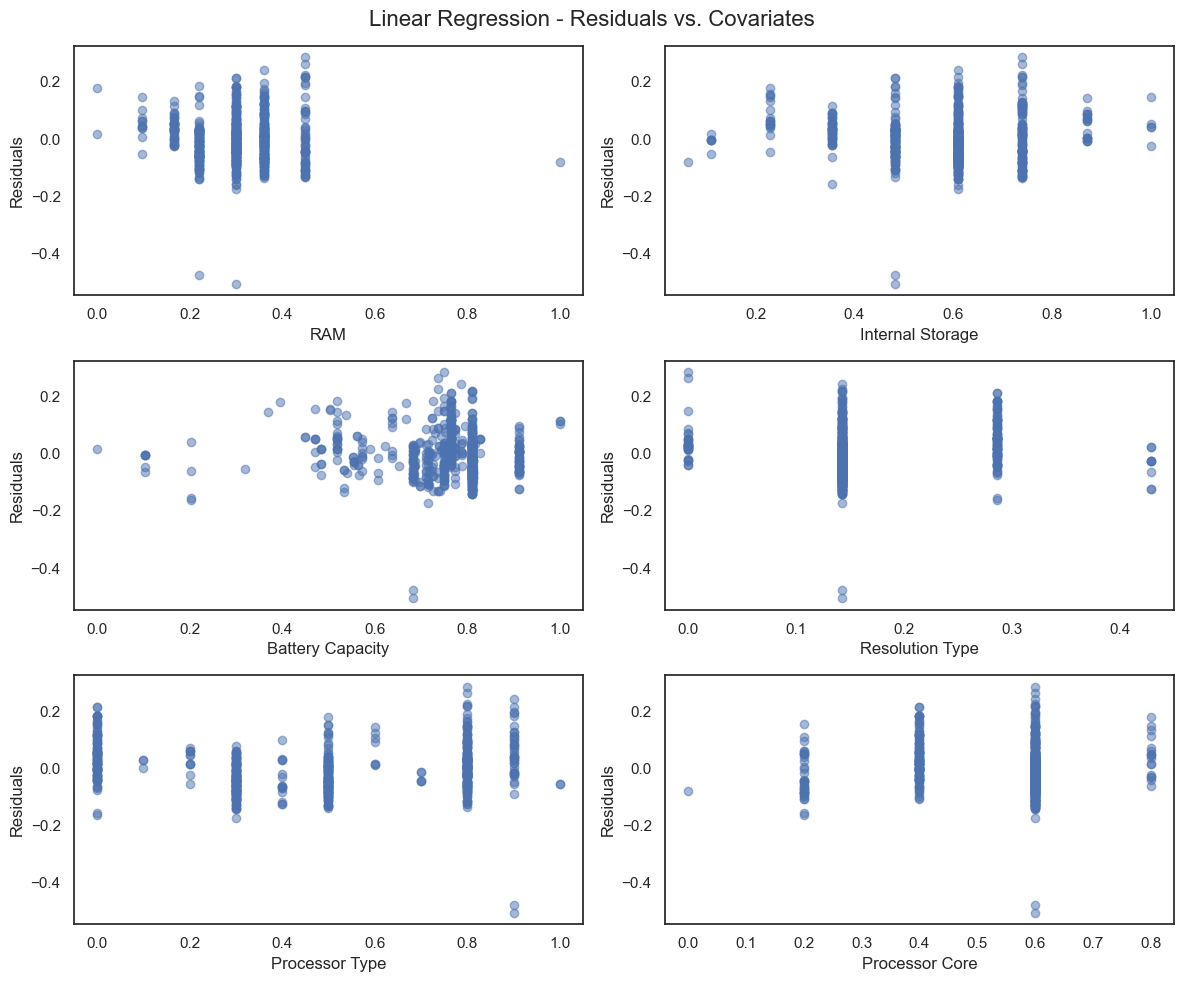

In [37]:
plot_residual_vs_covariates(residuals, covariates, model_name)


Applying the Gaussian Process model to the test data and calculating various metrics.

In [38]:
residuals = y_test - gpr_pred
model_name = 'Gaussian Process'
gpr_metrics = calculate_metrics(y_test, gpr_pred, covariates, model_name)
gpr_metrics.T


,0
Model,Gaussian Process
R-squared,0.763694
MAE,0.045021
MSE,0.004102
MAPE,8.262112
Theil's U1,0.095664
Theil's U2,0.09595
Index of Agreement,0.928707
Durbin-Watson Statistic,2.157801
Heteroscedasticity,Yes


Plotting the histogram of residuals for the Gaussian Process model.

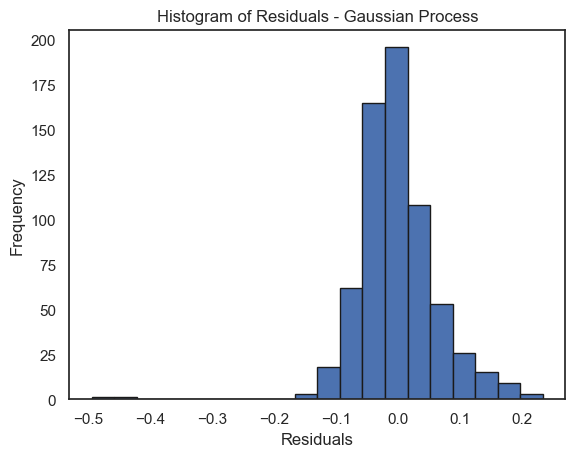

In [39]:
plot_residual_histogram(residuals, model_name)


Creating scatter plots of residuals against covariates for the Gaussian Process model.

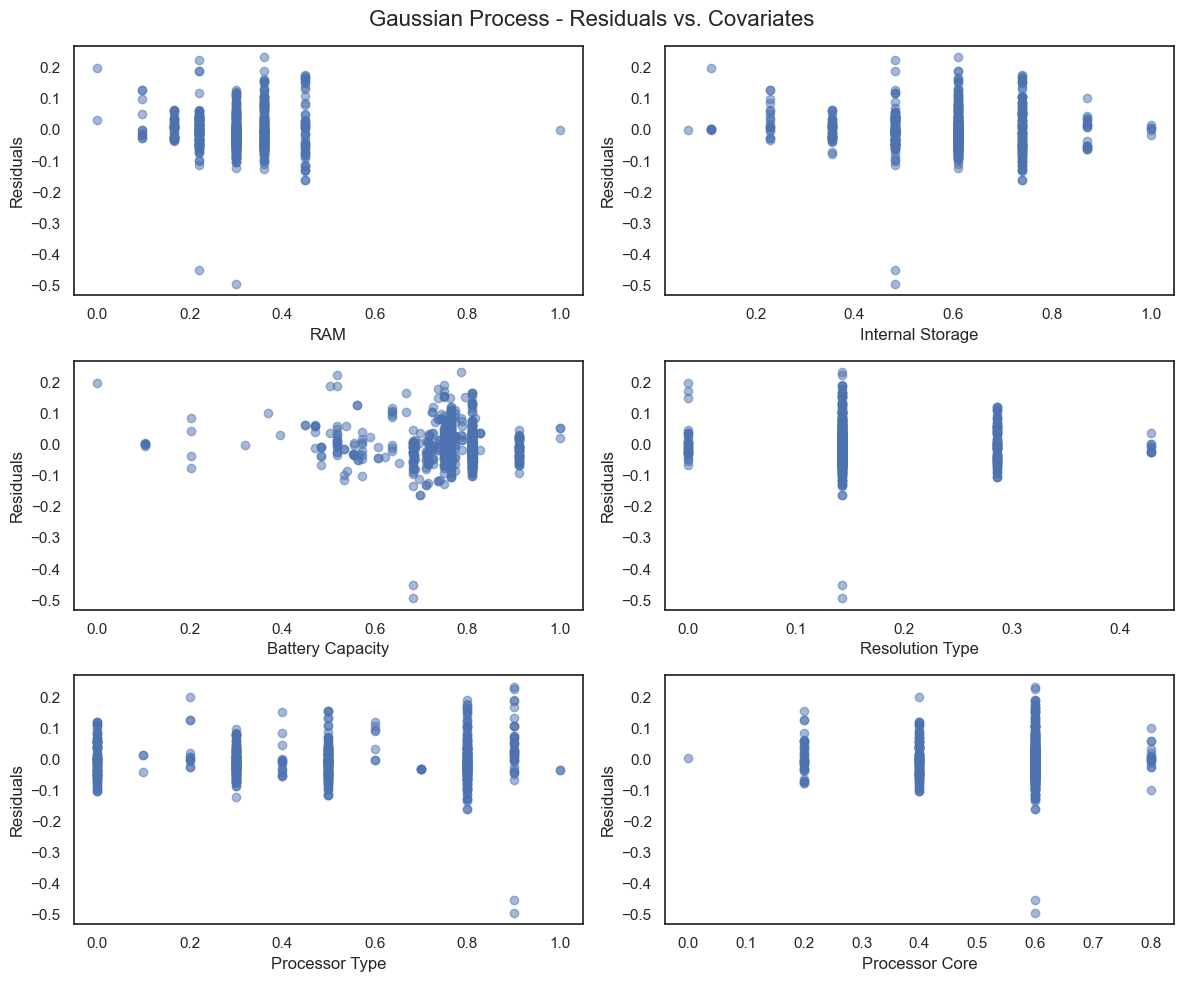

In [40]:
plot_residual_vs_covariates(residuals, covariates, model_name)


Combining the evaluation metrics for both models into a single DataFrame.

The DataFrame provides a summary of model evaluation metrics for the Linear Regression and Gaussian Process models.

In [41]:
combined_metrics = pd.concat([lr_metrics, gpr_metrics], ignore_index=True)
combined_metrics


,Model,R-squared,MAE,MSE,MAPE,Theil's U1,Theil's U2,Index of Agreement,Durbin-Watson Statistic,Heteroscedasticity,Breusch-Pagan LM Statistic,Breusch-Pagan LM P-Value,Breusch-Pagan F-Stat,Breusch-Pagan F P-Value
0,Linear Regression,0.632301,0.059899,0.006383,10.685678,0.119332,0.119961,0.874461,2.137027,Yes,14.896712,0.021075,2.513177,0.020624
1,Gaussian Process,0.763694,0.045021,0.004102,8.262112,0.095664,0.095950,0.928707,2.157801,Yes,26.242252,0.000201,4.506504,0.000174


Saving the Gaussian Process model to a file for model deployment.

In [ ]:
with open('model.pkl', 'wb') as f:
    pickle.dump(gpr_model, f)
